# Introduccion y Objetivo del analisis
Un programa de bicicletas compartidas que incluye 5,800 bicicletas y 600 estaciones. Cyclistic se destaca por ofrecer también bicicletas reclinadas, triciclos manuales y bicicletas de carga que ofrecen un uso más inclusivo de las bicicletas compartidas para las personas con discapacidad y los ciclistas que no pueden utilizar una bicicleta estándar de dos ruedas. La mayoría de los ciclistas eligen las bicicletas tradicionales, alrededor de un 8% de los ciclistas usan las opciones asistidas. Los usuarios de Cyclistic son más propensos a utilizar la bicicleta para recreación, pero alrededor del 30% la utiliza para ir al trabajo cada día.

**El objetivo:** Se determino que financieramente es mas rentable tener clientes Anuales, por lo que el objetivo sera dejar de lado las estrategias orientadas a los clientes nuevos y tomar un enfoque dedicado a convertir los clientes casuales(Customer) en clientes anuales(Subscribers). Y para determinar esto es necesario entender los diferentes usos que le dan los clientes al servicio que ofrece la empresa.

Cargamos los paquetes requeridos, tidyverse Para importar y manipular datos,lubridate para funciones de datos, ggplot2 para visualizaciones.

In [1]:
library(tidyverse)  #Ayuda a manejar mejor los datos
library(lubridate)  #Ayuda a disputar los atributos de los datos
library(ggplot2)  #Visualizacion de datos
getwd() 


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.0     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.4.1     ✔ tibble    3.1.8
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


[1] "/kaggle/working"

Procedemos a ordenar nuestros DF en variables mas faciles de llamar.

In [2]:
Q1 <- read.csv("/kaggle/input/cyclistic-bikeshare-analysis-case-study/Divvy_Trips_2019_Q1.csv")
Q2 <- read.csv("/kaggle/input/cyclistic-bikeshare-analysis-case-study/Divvy_Trips_2019_Q2.csv")
Q3 <- read.csv("/kaggle/input/cyclistic-bikeshare-analysis-case-study/Divvy_Trips_2019_Q3.csv")
Q4 <- read.csv("/kaggle/input/cyclistic-bikeshare-analysis-case-study/Divvy_Trips_2019_Q4.csv")


Llamamos el nombre de las columnas de cada uno de los DF

In [3]:

colnames(Q1)
colnames(Q2)
colnames(Q3)
colnames(Q4)



[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "X01...Rental.Details.Rental.ID"                   
 [2] "X01...Rental.Details.Local.Start.Time"            
 [3] "X01...Rental.Details.Local.End.Time"              
 [4] "X01...Rental.Details.Bike.ID"                     
 [5] "X01...Rental.Details.Duration.In.Seconds.Uncapped"
 [6] "X03...Rental.Start.Station.ID"                    
 [7] "X03...Rental.Start.Station.Name"                  
 [8] "X02...Rental.End.Station.ID"                      
 [9] "X02...Rental.End.Station.Name"                    
[10] "User.Type"                                        
[11] "Member.Gender"                                    
[12] "X05...Member.Details.Member.Birthday.Year"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

[1] "trip_id"           "start_time"        "end_time"         
 [4] "bikeid"            "tripduration"      "from_station_id"  
 [7] "from_station_name" "to_station_id"     "to_station_name"  
[10] "usertype"          "gender"            "birthyear"

Voy a cambiarle los nombres a las columnas que voy a utilizar y darles un formato uniforme para posterior poder unirlos todos en un solo DF

In [4]:
(Q1 <- rename(Q1
                   ,id_viaje = trip_id
                   ,id_bici = bikeid 
                   ,empezo = start_time  
                   ,termino = end_time  
                   ,estacion_partida = from_station_name 
                   ,id_estacion_inicial = from_station_id 
                   ,estacion_llegada = to_station_name 
                   ,id_estacion_llegada = to_station_id 
                   ,membrecia = usertype))


(Q2<- rename(Q2
                   ,id_viaje = "X01...Rental.Details.Rental.ID"
                   ,id_bici = "X01...Rental.Details.Bike.ID" 
                   ,empezo = "X01...Rental.Details.Local.Start.Time"  
                   ,termino = "X01...Rental.Details.Local.End.Time"  
                   ,estacion_partida = "X03...Rental.Start.Station.Name" 
                   ,id_estacion_inicial = "X03...Rental.Start.Station.ID"
                   ,estacion_llegada = "X02...Rental.End.Station.Name" 
                   ,id_estacion_llegada = "X02...Rental.End.Station.ID"
                   ,membrecia = "User.Type"))

(Q3 <- rename(Q3
                   ,id_viaje = trip_id
                   ,id_bici = bikeid 
                   ,empezo = start_time  
                   ,termino = end_time  
                   ,estacion_partida = from_station_name 
                   ,id_estacion_inicial = from_station_id 
                   ,estacion_llegada = to_station_name 
                   ,id_estacion_llegada = to_station_id 
                   ,membrecia = usertype))
(Q4 <- rename(Q4
                   ,id_viaje = trip_id
                   ,id_bici = bikeid 
                   ,empezo = start_time  
                   ,termino = end_time  
                   ,estacion_partida = from_station_name 
                   ,id_estacion_inicial = from_station_id 
                   ,estacion_llegada = to_station_name 
                   ,id_estacion_llegada = to_station_id 
                   ,membrecia = usertype))



id_viaje,empezo,termino,id_bici,tripduration,id_estacion_inicial,estacion_partida,id_estacion_llegada,estacion_llegada,membrecia,gender,birthyear
<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>
21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989
21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990
21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994
21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993
21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994
21742448,2019-01-01 00:15:33,2019-01-01 00:19:09,2437,216.0,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Female,1983
21742449,2019-01-01 00:16:06,2019-01-01 00:19:03,2708,177.0,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Male,1984
21742450,2019-01-01 00:18:41,2019-01-01 00:20:21,2796,100.0,211,St. Clair St & Erie St,142,McClurg Ct & Erie St,Subscriber,Male,1990
21742451,2019-01-01 00:18:43,2019-01-01 00:47:30,6205,"1,727.0",150,Fort Dearborn Dr & 31st St,148,State St & 33rd St,Subscriber,Male,1995


id_viaje,empezo,termino,id_bici,X01...Rental.Details.Duration.In.Seconds.Uncapped,id_estacion_inicial,estacion_partida,id_estacion_llegada,estacion_llegada,membrecia,Member.Gender,X05...Member.Details.Member.Birthday.Year
<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>
22178529,2019-04-01 00:02:22,2019-04-01 00:09:48,6251,446.0,81,Daley Center Plaza,56,Desplaines St & Kinzie St,Subscriber,Male,1975
22178530,2019-04-01 00:03:02,2019-04-01 00:20:30,6226,"1,048.0",317,Wood St & Taylor St,59,Wabash Ave & Roosevelt Rd,Subscriber,Female,1984
22178531,2019-04-01 00:11:07,2019-04-01 00:15:19,5649,252.0,283,LaSalle St & Jackson Blvd,174,Canal St & Madison St,Subscriber,Male,1990
22178532,2019-04-01 00:13:01,2019-04-01 00:18:58,4151,357.0,26,McClurg Ct & Illinois St,133,Kingsbury St & Kinzie St,Subscriber,Male,1993
22178533,2019-04-01 00:19:26,2019-04-01 00:36:13,3270,"1,007.0",202,Halsted St & 18th St,129,Blue Island Ave & 18th St,Subscriber,Male,1992
22178534,2019-04-01 00:19:39,2019-04-01 00:23:56,3123,257.0,420,Ellis Ave & 55th St,426,Ellis Ave & 60th St,Subscriber,Male,1999
22178535,2019-04-01 00:26:33,2019-04-01 00:35:41,6418,548.0,503,Drake Ave & Fullerton Ave,500,Central Park Ave & Elbridge Ave,Subscriber,Male,1969
22178536,2019-04-01 00:29:48,2019-04-01 00:36:11,4513,383.0,260,Kedzie Ave & Milwaukee Ave,499,Kosciuszko Park,Subscriber,Male,1991
22178537,2019-04-01 00:32:07,2019-04-01 01:07:44,3280,"2,137.0",211,St. Clair St & Erie St,211,St. Clair St & Erie St,Customer,,NA


id_viaje,empezo,termino,id_bici,tripduration,id_estacion_inicial,estacion_partida,id_estacion_llegada,estacion_llegada,membrecia,gender,birthyear
<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>
23479388,2019-07-01 00:00:27,2019-07-01 00:20:41,3591,"1,214.0",117,Wilton Ave & Belmont Ave,497,Kimball Ave & Belmont Ave,Subscriber,Male,1992
23479389,2019-07-01 00:01:16,2019-07-01 00:18:44,5353,"1,048.0",381,Western Ave & Monroe St,203,Western Ave & 21st St,Customer,,NA
23479390,2019-07-01 00:01:48,2019-07-01 00:27:42,6180,"1,554.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,,NA
23479391,2019-07-01 00:02:07,2019-07-01 00:27:10,5540,"1,503.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,,NA
23479392,2019-07-01 00:02:13,2019-07-01 00:22:26,6014,"1,213.0",168,Michigan Ave & 14th St,62,McCormick Place,Customer,,NA
23479393,2019-07-01 00:02:21,2019-07-01 00:07:31,4941,310.0,300,Broadway & Barry Ave,232,Pine Grove Ave & Waveland Ave,Subscriber,Male,1990
23479394,2019-07-01 00:02:24,2019-07-01 00:23:12,3770,"1,248.0",168,Michigan Ave & 14th St,62,McCormick Place,Customer,,NA
23479395,2019-07-01 00:02:26,2019-07-01 00:28:16,5442,"1,550.0",313,Lakeview Ave & Fullerton Pkwy,144,Larrabee St & Webster Ave,Customer,,NA
23479396,2019-07-01 00:02:34,2019-07-01 00:28:57,2957,"1,583.0",43,Michigan Ave & Washington St,195,Columbus Dr & Randolph St,Customer,,NA


id_viaje,empezo,termino,id_bici,tripduration,id_estacion_inicial,estacion_partida,id_estacion_llegada,estacion_llegada,membrecia,gender,birthyear
<int>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>
25223640,2019-10-01 00:01:39,2019-10-01 00:17:20,2215,940.0,20,Sheffield Ave & Kingsbury St,309,Leavitt St & Armitage Ave,Subscriber,Male,1987
25223641,2019-10-01 00:02:16,2019-10-01 00:06:34,6328,258.0,19,Throop (Loomis) St & Taylor St,241,Morgan St & Polk St,Subscriber,Male,1998
25223642,2019-10-01 00:04:32,2019-10-01 00:18:43,3003,850.0,84,Milwaukee Ave & Grand Ave,199,Wabash Ave & Grand Ave,Subscriber,Female,1991
25223643,2019-10-01 00:04:32,2019-10-01 00:43:43,3275,"2,350.0",313,Lakeview Ave & Fullerton Pkwy,290,Kedzie Ave & Palmer Ct,Subscriber,Male,1990
25223644,2019-10-01 00:04:34,2019-10-01 00:35:42,5294,"1,867.0",210,Ashland Ave & Division St,382,Western Ave & Congress Pkwy,Subscriber,Male,1987
25223645,2019-10-01 00:04:38,2019-10-01 00:10:51,1891,373.0,156,Clark St & Wellington Ave,226,Racine Ave & Belmont Ave,Subscriber,Female,1994
25223646,2019-10-01 00:04:52,2019-10-01 00:22:45,1061,"1,072.0",84,Milwaukee Ave & Grand Ave,142,McClurg Ct & Erie St,Subscriber,Female,1991
25223647,2019-10-01 00:04:57,2019-10-01 00:29:16,1274,"1,458.0",156,Clark St & Wellington Ave,463,Clark St & Berwyn Ave,Subscriber,Male,1995
25223648,2019-10-01 00:05:20,2019-10-01 00:29:18,6011,"1,437.0",156,Clark St & Wellington Ave,463,Clark St & Berwyn Ave,Subscriber,Female,1993


Vemos los datos y sus formatos para determinar si hacen falta cambios


In [5]:
str(Q1)
str(Q2)
str(Q3)
str(Q4)


'data.frame':	365069 obs. of  12 variables:
 $ id_viaje           : int  21742443 21742444 21742445 21742446 21742447 21742448 21742449 21742450 21742451 21742452 ...
 $ empezo             : chr  "2019-01-01 00:04:37" "2019-01-01 00:08:13" "2019-01-01 00:13:23" "2019-01-01 00:13:45" ...
 $ termino            : chr  "2019-01-01 00:11:07" "2019-01-01 00:15:34" "2019-01-01 00:27:12" "2019-01-01 00:43:28" ...
 $ id_bici            : int  2167 4386 1524 252 1170 2437 2708 2796 6205 3939 ...
 $ tripduration       : chr  "390.0" "441.0" "829.0" "1,783.0" ...
 $ id_estacion_inicial: int  199 44 15 123 173 98 98 211 150 268 ...
 $ estacion_partida   : chr  "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ id_estacion_llegada: int  84 624 644 176 35 49 49 142 148 141 ...
 $ estacion_llegada   : chr  "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ membrecia       

Antes de llevar todos los cuartiles a un solo DF voy a cambiarle el formato a dos columnas de int a Chr

In [6]:
Q4 <-  mutate(Q4, id_viaje = as.character(id_viaje)
                   ,id_bici = as.character(id_bici)) 
Q3 <-  mutate(Q3, id_viaje = as.character(id_viaje)
                   ,id_bici = as.character(id_bici)) 
Q2 <-  mutate(Q2, id_viaje = as.character(id_viaje)
                   ,id_bici = as.character(id_bici)) 
Q1 <-  mutate(Q1, id_viaje = as.character(id_viaje)
                   ,id_bici = as.character(id_bici)) 


Juntamos todos los cuartiles y procedemos a ver un resumen del DF completo


In [7]:
viajes_2019 <- bind_rows(Q1, Q2, Q3, Q4)

In [8]:
head(viajes_2019)

,id_viaje,empezo,termino,id_bici,tripduration,id_estacion_inicial,estacion_partida,id_estacion_llegada,estacion_llegada,membrecia,gender,birthyear,X01...Rental.Details.Duration.In.Seconds.Uncapped,Member.Gender,X05...Member.Details.Member.Birthday.Year
,<chr>,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>,<chr>,<int>,<chr>,<chr>,<int>
1,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,390.0,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber,Male,1989,NA,NA,NA
2,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,441.0,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber,Female,1990,NA,NA,NA
3,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,829.0,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber,Female,1994,NA,NA,NA
4,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,"1,783.0",123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber,Male,1993,NA,NA,NA
5,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,364.0,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber,Male,1994,NA,NA,NA
6,21742448,2019-01-01 00:15:33,2019-01-01 00:19:09,2437,216.0,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber,Female,1983,NA,NA,NA


Como no voy a utilizar las columnas descriptivas ni los formatos que tienen por defecto los conteos de viajes voy a sacarlos, ademas de que la cantidad de nulls puede ser contraproducente.

In [9]:
viajes_2019 <- viajes_2019 %>%  
  select(-c(birthyear, gender, "X01...Rental.Details.Duration.In.Seconds.Uncapped", "X05...Member.Details.Member.Birthday.Year", "Member.Gender", "tripduration"))

Ahora si veamos como quedaria el DF analizandolo desde distintos comandos.

In [10]:
colnames(viajes_2019)

head(viajes_2019)

nrow(viajes_2019)

dim(viajes_2019)

summary(viajes_2019)

str(viajes_2019)

[1] "id_viaje"            "empezo"              "termino"            
[4] "id_bici"             "id_estacion_inicial" "estacion_partida"   
[7] "id_estacion_llegada" "estacion_llegada"    "membrecia"

,id_viaje,empezo,termino,id_bici,id_estacion_inicial,estacion_partida,id_estacion_llegada,estacion_llegada,membrecia
,<chr>,<chr>,<chr>,<chr>,<int>,<chr>,<int>,<chr>,<chr>
1,21742443,2019-01-01 00:04:37,2019-01-01 00:11:07,2167,199,Wabash Ave & Grand Ave,84,Milwaukee Ave & Grand Ave,Subscriber
2,21742444,2019-01-01 00:08:13,2019-01-01 00:15:34,4386,44,State St & Randolph St,624,Dearborn St & Van Buren St (*),Subscriber
3,21742445,2019-01-01 00:13:23,2019-01-01 00:27:12,1524,15,Racine Ave & 18th St,644,Western Ave & Fillmore St (*),Subscriber
4,21742446,2019-01-01 00:13:45,2019-01-01 00:43:28,252,123,California Ave & Milwaukee Ave,176,Clark St & Elm St,Subscriber
5,21742447,2019-01-01 00:14:52,2019-01-01 00:20:56,1170,173,Mies van der Rohe Way & Chicago Ave,35,Streeter Dr & Grand Ave,Subscriber
6,21742448,2019-01-01 00:15:33,2019-01-01 00:19:09,2437,98,LaSalle St & Washington St,49,Dearborn St & Monroe St,Subscriber


[1] 3818004

[1] 3818004       9

   id_viaje            empezo            termino            id_bici         
 Length:3818004     Length:3818004     Length:3818004     Length:3818004    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 id_estacion_inicial estacion_partida   id_estacion_llegada estacion_llegada  
 Min.   :  1.0       Length:3818004     Min.   :  1.0       Length:3818004    
 1st Qu.: 77.0       Class :character   1st Qu.: 77.0       Class :character  
 Median :174.0       Mode  :character   Median :174.0       Mode  :character  
 Mean   :201.7                          Mean   :202.6                         
 3rd Qu.:289.0                          3rd Qu.:291.0             

'data.frame':	3818004 obs. of  9 variables:
 $ id_viaje           : chr  "21742443" "21742444" "21742445" "21742446" ...
 $ empezo             : chr  "2019-01-01 00:04:37" "2019-01-01 00:08:13" "2019-01-01 00:13:23" "2019-01-01 00:13:45" ...
 $ termino            : chr  "2019-01-01 00:11:07" "2019-01-01 00:15:34" "2019-01-01 00:27:12" "2019-01-01 00:43:28" ...
 $ id_bici            : chr  "2167" "4386" "1524" "252" ...
 $ id_estacion_inicial: int  199 44 15 123 173 98 98 211 150 268 ...
 $ estacion_partida   : chr  "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ id_estacion_llegada: int  84 624 644 176 35 49 49 142 148 141 ...
 $ estacion_llegada   : chr  "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ membrecia          : chr  "Subscriber" "Subscriber" "Subscriber" "Subscriber" ...


Cambiamos el nombre de los clientes a Miembro y Casual.

In [11]:
viajes_2019 <-  viajes_2019 %>% 
  mutate(membrecia = recode(membrecia
                           ,"Subscriber" = "Miembro"
                           ,"Customer" = "Casual"))


Bien ahora para hacer un df mas completo y facil de analizar por partes vamos a dividir las fechas para poder tener una columna dedicada para fecha, mes, dia, año y dia de la semana.

In [12]:
#Lo primero que observo y me gustaria profundizar es en la division de columnas para integrar
#la fecha, dias, meses, dia de la semana y años para tener mas columnas en las que agregar funciones.
viajes_2019$date <- as.Date(viajes_2019$empezo)
viajes_2019$month <- format(as.Date(viajes_2019$date), "%m")
viajes_2019$day <- format(as.Date(viajes_2019$date), "%d")
viajes_2019$year <- format(as.Date(viajes_2019$date), "%Y")
viajes_2019$day_of_week <- format(as.Date(viajes_2019$date), "%A")


Agregamos la duracion de cada viaje en minutos haciendo un difftime o sea,diferencia entre la hora de la columna termino, con la columna empezo.


In [13]:

viajes_2019$duracion <- difftime(viajes_2019$termino,viajes_2019$empezo)

Analizamos la estructura de los datos nuevamente

In [14]:
str(viajes_2019)

'data.frame':	3818004 obs. of  15 variables:
 $ id_viaje           : chr  "21742443" "21742444" "21742445" "21742446" ...
 $ empezo             : chr  "2019-01-01 00:04:37" "2019-01-01 00:08:13" "2019-01-01 00:13:23" "2019-01-01 00:13:45" ...
 $ termino            : chr  "2019-01-01 00:11:07" "2019-01-01 00:15:34" "2019-01-01 00:27:12" "2019-01-01 00:43:28" ...
 $ id_bici            : chr  "2167" "4386" "1524" "252" ...
 $ id_estacion_inicial: int  199 44 15 123 173 98 98 211 150 268 ...
 $ estacion_partida   : chr  "Wabash Ave & Grand Ave" "State St & Randolph St" "Racine Ave & 18th St" "California Ave & Milwaukee Ave" ...
 $ id_estacion_llegada: int  84 624 644 176 35 49 49 142 148 141 ...
 $ estacion_llegada   : chr  "Milwaukee Ave & Grand Ave" "Dearborn St & Van Buren St (*)" "Western Ave & Fillmore St (*)" "Clark St & Elm St" ...
 $ membrecia          : chr  "Miembro" "Miembro" "Miembro" "Miembro" ...
 $ date               : Date, format: "2019-01-01" "2019-01-01" ...
 $ month    

La columna duracion va a tener que ser cambiada de formato para que no sea un inconveniente a la hora de analizarla.

In [15]:
is.factor(viajes_2019$duracion)
viajes_2019$duracion <- as.numeric(as.character(viajes_2019$duracion))
is.numeric(viajes_2019$duracion)


[1] FALSE

[1] TRUE

Convertimos el formato de la columna duracion de factor a numerico, para que de esta manera nos resulte mas facil realizar calculos



In [16]:
summary(viajes_2019)

   id_viaje            empezo            termino            id_bici         
 Length:3818004     Length:3818004     Length:3818004     Length:3818004    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 id_estacion_inicial estacion_partida   id_estacion_llegada estacion_llegada  
 Min.   :  1.0       Length:3818004     Min.   :  1.0       Length:3818004    
 1st Qu.: 77.0       Class :character   1st Qu.: 77.0       Class :character  
 Median :174.0       Mode  :character   Median :174.0       Mode  :character  
 Mean   :201.7                          Mean   :202.6                         
 3rd Qu.:289.0                          3rd Qu.:291.0             

Note que parecen haber valores erroneos en el DF que dan resultados negativos en la columna duracion

Luego de investigar pude dar con que hay un recuento erroneo en donde no se tomaron en cuenta los dias de control de calidad que realiza la empresa,en estos controles se toman las bicis y generan este vacio de viajes, esto hizo que haya un mal recuento de las bicis.
Asique vamos a hace un nuevo Df en donde estos dias no interfiran en la duracion de los viajes.


In [17]:
viajes_2019_v2 <- viajes_2019[!(viajes_2019$estacion_partida == "HQ QR" | viajes_2019$duracion<0),]


In [18]:
summary(viajes_2019_v2)

   id_viaje            empezo            termino            id_bici         
 Length:3817991     Length:3817991     Length:3817991     Length:3817991    
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
 id_estacion_inicial estacion_partida   id_estacion_llegada estacion_llegada  
 Min.   :  1.0       Length:3817991     Min.   :  1.0       Length:3817991    
 1st Qu.: 77.0       Class :character   1st Qu.: 77.0       Class :character  
 Median :174.0       Mode  :character   Median :174.0       Mode  :character  
 Mean   :201.7                          Mean   :202.6                         
 3rd Qu.:289.0                          3rd Qu.:291.0             

Bien ahora que los datos estan limpios y uniformes podemos proceder a su devido analisis.
Vamos a empezar con lo basico que es ver la columna de duracion y determinar distintos valores.

In [19]:
mean(viajes_2019_v2$duracion) #duracion promedio (total duracion / viajes)
median(viajes_2019_v2$duracion) #Punto medio de duracion de viajes
max(viajes_2019_v2$duracion) #Viaje mas largo
min(viajes_2019_v2$duracion) #Viaje mas corto


[1] 24.17443

[1] 11.81667

[1] 177200.4

[1] 1.016667

Otra manera, mas facil.

In [20]:
summary(viajes_2019_v2$duracion)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
     1.02      6.85     11.82     24.17     21.40 177200.37 

Ahora comparamos las medidas previamente realizadas entre las distintas membrecias

In [21]:
aggregate(viajes_2019_v2$duracion ~ viajes_2019_v2$membrecia, FUN = mean)
aggregate(viajes_2019_v2$duracion ~ viajes_2019_v2$membrecia, FUN = median)
aggregate(viajes_2019_v2$duracion ~ viajes_2019_v2$membrecia, FUN = max)
aggregate(viajes_2019_v2$duracion ~ viajes_2019_v2$membrecia, FUN = min)


viajes_2019_v2$membrecia,viajes_2019_v2$duracion
<chr>,<dbl>
Casual,57.01802
Miembro,14.32780


viajes_2019_v2$membrecia,viajes_2019_v2$duracion
<chr>,<dbl>
Casual,25.83333
Miembro,9.80000


viajes_2019_v2$membrecia,viajes_2019_v2$duracion
<chr>,<dbl>
Casual,177200.4
Miembro,150943.9


viajes_2019_v2$membrecia,viajes_2019_v2$duracion
<chr>,<dbl>
Casual,1.016667
Miembro,1.016667


Vemos que los Min y Max viajes son bastante identicos, la variable mas notable son las otras dos medidas, vamos a continuar.


Lo que voy a ver ahora va a ser la duracion promedio de viajes en los dias de la semana, comparandolo entre los distintos miembros.

In [22]:
aggregate(viajes_2019_v2$duracion ~ viajes_2019_v2$membrecia + viajes_2019_v2$day_of_week, FUN = mean)

viajes_2019_v2$membrecia,viajes_2019_v2$day_of_week,viajes_2019_v2$duracion
<chr>,<chr>,<dbl>
Casual,Friday,60.17561
Miembro,Friday,13.89748
Casual,Monday,54.49989
Miembro,Monday,14.24928
Casual,Saturday,54.06111
Miembro,Saturday,16.30271
Casual,Sunday,56.18519
Miembro,Sunday,15.40290
Casual,Thursday,59.95112


Notamos que los dias de la semana estan desordenados, vamos a corregir eso antes.

In [23]:
viajes_2019_v2$day_of_week <- ordered(viajes_2019_v2$day_of_week, levels=c("Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"))

Volvemos a ejecutar el codigo.

In [24]:
aggregate(viajes_2019_v2$duracion ~ viajes_2019_v2$membrecia + viajes_2019_v2$day_of_week, FUN = mean)

viajes_2019_v2$membrecia,viajes_2019_v2$day_of_week,viajes_2019_v2$duracion
<chr>,<ord>,<dbl>
Casual,Sunday,56.18519
Miembro,Sunday,15.40290
Casual,Monday,54.49989
Miembro,Monday,14.24928
Casual,Tuesday,57.41328
Miembro,Tuesday,14.15259
Casual,Wednesday,60.33407
Miembro,Wednesday,13.80984
Casual,Thursday,59.95112


Para organizar mejor este segmento vamos a analizar los viajes s

In [25]:
viajes_2019_v2 %>% 
  mutate(weekday = wday(empezo, label = TRUE)) %>% #creates weekday field using wday()
  group_by(membrecia, weekday) %>%  #groups by usertype and weekday
  summarise(viajes_totales = n()#calculates the number of rides and average duration 
  ,duracion_promedio = mean(duracion)) %>%# calculates the average duration
  arrange(membrecia, weekday)

`summarise()` has grouped output by 'membrecia'. You can override using the
`.groups` argument.


membrecia,weekday,viajes_totales,duracion_promedio
<chr>,<ord>,<int>,<dbl>
Casual,Sun,170173,56.18519
Casual,Mon,101489,54.49989
Casual,Tue,88655,57.41328
Casual,Wed,89745,60.33407
Casual,Thu,101372,59.95112
Casual,Fri,121141,60.17561
Casual,Sat,208056,54.06111
Miembro,Sun,256234,15.40290
Miembro,Mon,458780,14.24928


`summarise()` has grouped output by 'membrecia'. You can override using the
`.groups` argument.


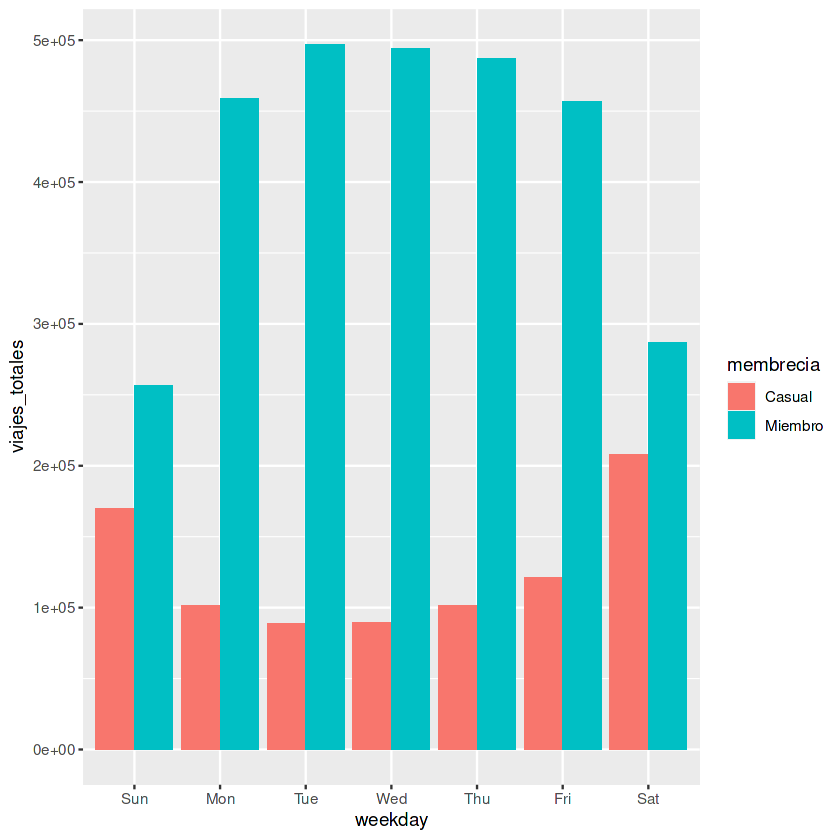

In [26]:
viajes_2019_v2 %>% 
  mutate(weekday = wday(empezo, label = TRUE)) %>% 
  group_by(membrecia, weekday) %>% 
  summarise(viajes_totales = n()
            ,duracion_promedio = mean(duracion)) %>% 
  arrange(membrecia, weekday)  %>% 
  ggplot(aes(x = weekday, y = viajes_totales, fill = membrecia)) +
  geom_col(position = "dodge")

`summarise()` has grouped output by 'membrecia'. You can override using the
`.groups` argument.


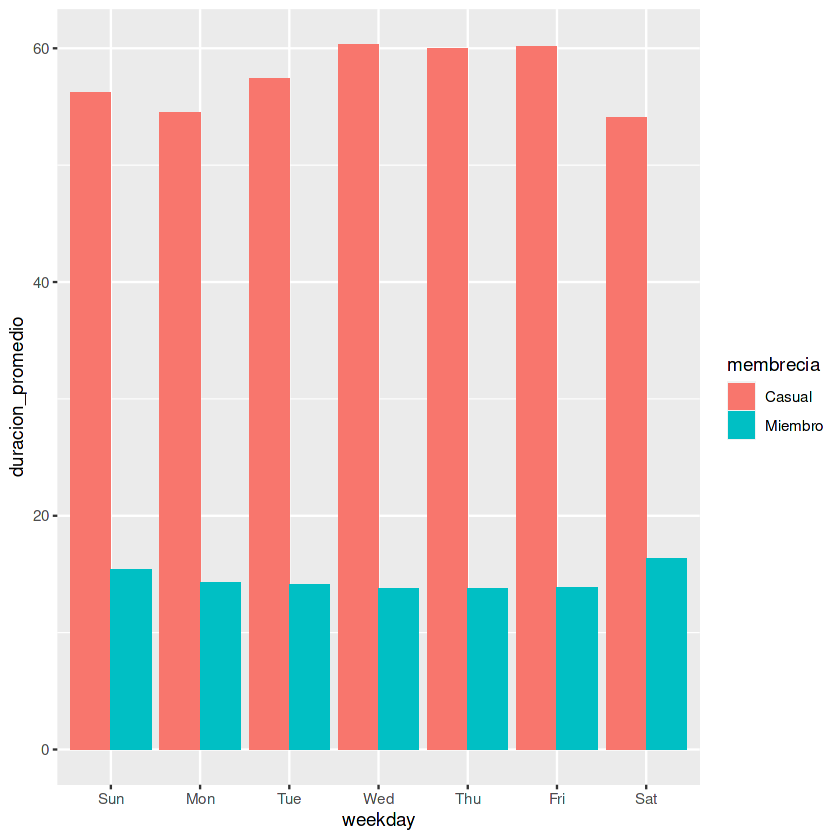

In [27]:
viajes_2019_v2 %>% 
  mutate(weekday = wday(empezo, label = TRUE)) %>% 
  group_by(membrecia, weekday) %>% 
  summarise(viajes_total = n(),duracion_promedio = mean(duracion)) %>% 
  arrange(membrecia, weekday)  %>% 
  ggplot(aes(x = weekday, y = duracion_promedio, fill = membrecia)) +
  geom_col(position = "dodge")